## Introduction <a id='introduction'></a>

Smooth local unconstrained optimization methods are methods used to find a local minimizer of a smooth function

$$f: \mathbb{R}^n \to \mathbb{R}.$$

By smooth, we usually mean twice continuously differentiable (even if the derivatives might be unavailable or hard to compute).

We are going to talk about one such method, the **Steepest Descent Method**. This method is classified as a Line Search method, as opposed to another class, called Trust Region Methods, which not be discussed here.

Now, given an initial point $x^0\in \mathbb{R}^n$, our methods try to generate a sequence of points $x^k\in \mathbb{R}^n$ such that each step is taken in a direction that (hopefully) decreases the objective function value; that is, we'll compute each new point as
$$x^{k+1} = x^k + \alpha^k d^k$$
where $d^k$ is called a *descent direction*, that is, a direction for which we know the objective function decreases at least locally, and $\alpha^k$ is a stepsize.

A solution is found once we have reached a point $x^k$ for which $\nabla f(x^k)=0$.

### Test function

The <a href="https://en.wikipedia.org/wiki/Rosenbrock_function">Rosenbrock function</a> is a well known function for testing optimization algorithms. It usually has the form

$$f(x) = (1-x_0)^2 + \alpha(x_1-x_0^2)^2$$

where $\alpha$ is some real number (usually positive). We will set $\alpha=10$:

In [84]:
def rosenbrock(x,y):
    return (1-x)**2+10*(y-x**2)**2

Now we can compute the value of the Rosenbrock function on

In [85]:
x = 2
y = 2

for example, by doing

In [86]:
rosenbrock(x,y)

41

Now, let's take a look at the Rosenbrock function. We can always get a better idea of the shape of the function using a contour plot (since this is a 2-variable function). Let's start by looking at the contour plots for rosenbrock at the $[-2,2]\times [-2,2]$ rectangle. For this, the easiest way is to use the linspace method of the numpy module, so we import this with a shorter name, np. Also, in order to do graphics, we mus

In [88]:
import numpy as np

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
R = rosenbrock(X, Y)

In order to do graphics, we will use the pyplot submodule of the matplotlib library; we will abbreviate this by plt, and we'll do our contour plot:

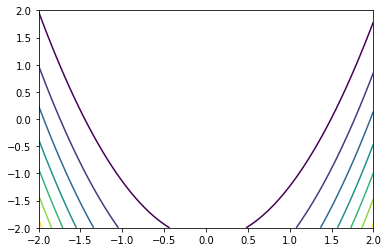

In [89]:
plt.figure()
plt.contour(X, Y, R)

To get a better look, let's try setting the contour levels manually, and see the contours we're missing on that plot.

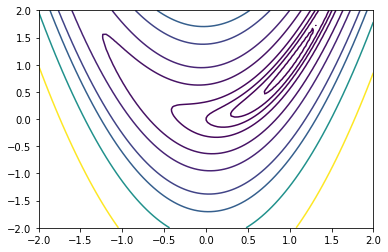

In [90]:
levels = [0, 0.1, 0.5, 1, 2, 5, 10, 20, 30, 50, 100]
plt.contour(X, Y, R, levels)

Now, it seems like a local minimizer can be fount around $(1,1)$. In fact,

In [91]:
rosenbrock(1,1)

0

Since rosenbrock is always positive, this is a good candidate for a minimizer!

### Steepest Descent Method

In order to compute a descent direction for any function $f$, we could use $-\nabla f(x)$, which is the opposite of the gradient of $f$. We know that, locally, this is the direction where $f$ descreases more rapidly, so this choice makes sense.

Now, we know that the gradient $\nabla f(x)$ (which we'll call grad(x)) of the rosenbrock function at any point can be computed as

In [60]:
def gradient(x,y):
    return np.asarray([2*x-2-40*x*(y-x**2), 20*(y-x**2)])

(observe that we have defined the output of the grad function as a ndarray, because we are going to perform computations with this vector later)

And thus if we call

In [61]:
x = 0; y = 0

Then the gradient computed at this point is

In [62]:
gradient(x,y)

array([-2,  0])

Suppose we call then

In [63]:
d = -gradient(x,y)

Let's see what a full step (that is, $\alpha^k=1$ [here](#introduction)) in this direction does:

In [64]:
starting_point = np.asarray([x,y])
new_point = starting_point + d

Thus

In [65]:
new_point

array([2, 0])

Let's see a picture of this:

In [66]:
def plot_rosenbrock_contours(points):
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    R = rosenbrock(X, Y)
    plt.figure()
    levels = [0, 0.1, 0.5, 1, 2, 5, 10, 20, 30, 50, 100]
    plt.contour(X, Y, R, levels)

    for point in points:
        plt.plot(point[0], point[1], 'ro')

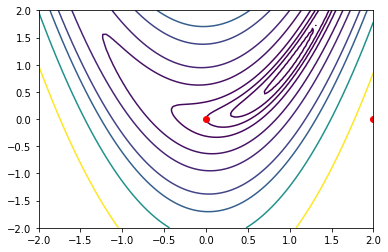

In [67]:
plot_rosenbrock_contours((starting_point, new_point))

Well, it looks like the step in this direction actually *increased* the objective function value!

In [68]:
rosenbrock(starting_point[0], starting_point[1])

1

In [69]:
rosenbrock(new_point[0], new_point[1])

161

There must be something we can do. Actually, what's wrong here is the choice of $\alpha^k$. So we propose a simple strategy: let's try to take a step in the direction d, but let's choose the largest $\alpha$ such that the objective function rosenbrock has a smaller value than before. We'll create a function for this, since we'll be reusing this later.

In [70]:
def linesearch(starting_point, d):
    alpha = 1
    starting_f = rosenbrock(starting_point[0], starting_point[1])
    new_point = starting_point + alpha*d
    while rosenbrock(new_point[0], new_point[1]) > starting_f:
        alpha = 0.9*alpha
        new_point = starting_point + alpha*d
    return new_point

In [71]:
new_point = linesearch(starting_point, d)

In [72]:
new_point

array([ 0.50837317,  0.        ])

In the picture:

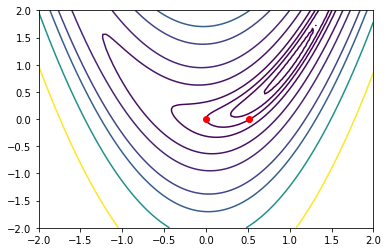

In [73]:
plot_rosenbrock_contours((starting_point, new_point))

Now it looks like we are making progress!

In [74]:
rosenbrock(new_point[0], new_point[1])

0.90962621110615483

Let's repeat this process, starting from our starting_point, until we have found a new_point for which we have a sufficiently small gradient. In order to measure the "size" of the gradient (which is a 2 dimensional vector) we will compute its norm; for this, we will use the scipy.linalg library)

In [93]:
import scipy.linalg as sp

Now we define our steepest descent algorithm:

In [94]:
def steepest_descent(fun, grad, starting_point, gradient_tolerance):
    new_point = starting_point
    d = -grad(new_point[0], new_point[1])
    while sp.norm(d) > gradient_tolerance:
        old_point = new_point
        new_point = linesearch(old_point, d)
        d = -grad(new_point[0], new_point[1])
    return new_point

In [100]:
steepest_descent(rosenbrock, gradient, starting_point, 1e-3)

(array([ 0.99977786,  0.99956856]),
 [array([0, 0]),
  array([ 0.50837317,  0.        ]),
  array([ 0.28479009,  0.27051135]),
  array([ 0.51661742,  0.02575787]),
  array([ 0.32744779,  0.25291389]),
  array([ 0.51663   ,  0.08347505]),
  array([ 0.38362026,  0.25627225]),
  array([ 0.53575727,  0.14206969]),
  array([ 0.43316211,  0.27863155]),
  array([ 0.57501145,  0.18338005]),
  array([ 0.46746393,  0.30822889]),
  array([ 0.59663694,  0.22372319]),
  array([ 0.49703715,  0.33584988]),
  array([ 0.6145234 ,  0.26055983]),
  array([ 0.53413847,  0.34989603]),
  array([ 0.63213702,  0.29513333]),
  array([ 0.55943092,  0.37484354]),
  array([ 0.6458779 ,  0.32762613]),
  array([ 0.5846504,  0.3959428]),
  array([ 0.66463644,  0.35464191]),
  array([ 0.60815722,  0.41445647]),
  array([ 0.67945075,  0.38042388]),
  array([ 0.62566011,  0.43620712]),
  array([ 0.68982795,  0.40547116]),
  array([ 0.6444355 ,  0.45381154]),
  array([ 0.70294313,  0.42736227]),
  array([ 0.65888155,  0

Finally, we can modify our steepest descent method save all the iterates (all the members of the generated sequence) and plot them to get an idea for the steepest descent path.

In [101]:
def steepest_descent(fun, grad, starting_point, gradient_tolerance):
    points = []
    new_point = starting_point
    points.append(new_point)
    d = -grad(new_point[0], new_point[1])
    while sp.norm(d) > gradient_tolerance:
        old_point = new_point
        new_point = linesearch(old_point, d)
        points.append(new_point)
        d = -grad(new_point[0], new_point[1])
    return new_point, points

In [102]:
final_point, points = steepest_descent(rosenbrock, gradient, starting_point, 1e-3)

In [103]:
points

[array([0, 0]),
 array([ 0.50837317,  0.        ]),
 array([ 0.28479009,  0.27051135]),
 array([ 0.51661742,  0.02575787]),
 array([ 0.32744779,  0.25291389]),
 array([ 0.51663   ,  0.08347505]),
 array([ 0.38362026,  0.25627225]),
 array([ 0.53575727,  0.14206969]),
 array([ 0.43316211,  0.27863155]),
 array([ 0.57501145,  0.18338005]),
 array([ 0.46746393,  0.30822889]),
 array([ 0.59663694,  0.22372319]),
 array([ 0.49703715,  0.33584988]),
 array([ 0.6145234 ,  0.26055983]),
 array([ 0.53413847,  0.34989603]),
 array([ 0.63213702,  0.29513333]),
 array([ 0.55943092,  0.37484354]),
 array([ 0.6458779 ,  0.32762613]),
 array([ 0.5846504,  0.3959428]),
 array([ 0.66463644,  0.35464191]),
 array([ 0.60815722,  0.41445647]),
 array([ 0.67945075,  0.38042388]),
 array([ 0.62566011,  0.43620712]),
 array([ 0.68982795,  0.40547116]),
 array([ 0.6444355 ,  0.45381154]),
 array([ 0.70294313,  0.42736227]),
 array([ 0.65888155,  0.47321346]),
 array([ 0.71768086,  0.44636991]),
 array([ 0.674

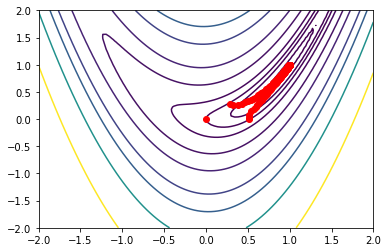

In [104]:
plot_rosenbrock_contours(points)

Ok! We found the solution. But this does not seem to be such a great method - it took us A LOT of iterations. If you are looking for a more efficient method, you can check out Newton's Method.

# Bibliography

[1] Nocedal, Wright. *Numerical Optimization*. 

### Initialization Cell

In [1]:
%matplotlib inline